# **DATA UNDERSTANDING**

## **Context**

**```Bagaimana Konteks bisnis berdasarkan data yang diberikan?```**

Sebuah perusahaan bernama "Northwind Traders" yang melakukan bisnis impor dan ekspor makanan khusus dari seluruh dunia. Terdapat sebuah database yang menunjukan detail dari proses transaksi. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## **Database Information**
**```Ada berapa banyak tabel yang disediakan oleh database yang tersedia?```**

Sumber Database: https://downloads.alphasoftware.com/a5v12Download/northwindmysql.zip

Database yang dimiliki mempunyai 8 tabel, yaitu:
- Categories    : Menyimpan informasi tentang kategori dan sub-kategori jenis produk.
- Customers     : Menyimpan informasi tentang data pelanggan/customer.
- Employees     : Menyimpan semua informasi karyawan.
- Orders        : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- OrderDetails  : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Products      : Menyimpan informasi tentang jenis produk.
- Shippers      : Menyimpan informasi jasa pengiriman produk.
- Suppliers     : Menyimpan informasi supplier barang.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail & Jumlah Transaksi**

**```Apakah tabel customers, orders, ordersdetail, dan products dapat digabungkan menjadi 1 tabel?```**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Costumer```, ```Orders```, ```OrderDetails```, dan ```Products```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- customerID dari tabel customers
- companyName dari tabel customers
- ContactTitle dari tabel customers
- city dari tabel customers
- country dari tabel customers
- orderID dari tabel orders
- orderDate dari tabel orders
- requiredDate dari tabel orders
- shippedDate dari tabel orders
- shipVia dari tabel orders
- shipCity dari tabel orders
- shipCountry dari tabel orders
- quantity dari tabel orderdetails
- unitPrice dari tabel orderdetails
- discount dari tabel orderdetails
- productName dari tabel products

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [4]:
# Query 1

tabel1 = sql_table (
    '''
select c.CustomerID, c.CompanyName, c.ContactTitle, c.City, c.Country,
o.orderID, o.OrderDate, o.RequiredDate, o.ShippedDate, s.CompanyName as shipVia, o.ShipCity, o.ShipCountry,
od.Quantity, od.UnitPrice, od. Discount,
p.ProductName

from customers c
left join orders o on c.customerID = o.CustomerID
left join orderdetails od on o.orderID = od.orderID
left join products p on od.productID = p.productID
left join shippers s on o.shipVia = s.shipperID;
    '''
)
tabel1

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName
0,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643.0,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,15.0,45.6000,0.25,R├Âssle Sauerkraut
1,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643.0,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,21.0,18.0000,0.25,Chartreuse verte
2,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643.0,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,2.0,12.0000,0.25,Spegesild
3,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10692.0,1995-11-03,1995-12-01,1995-11-13,United Package,Berlin,Germany,20.0,43.9000,0.00,Vegie-spread
4,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10702.0,1995-11-13,1995-12-25,1995-11-21,Speedy Express,Berlin,Germany,6.0,10.0000,0.00,Aniseed Syrup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998.0,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,12.0,4.5000,0.00,Guaran├í Fant├ística
2153,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998.0,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,7.0,28.5000,0.00,Sirop d'├®rable
2154,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998.0,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,20.0,10.0000,0.00,Longlife Tofu
2155,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998.0,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,30.0,7.7500,0.00,Rh├Ânbr├ñu Klosterbier


## **Data Jenis Produk, Kuantitas, dan Total Harga Beli**

```Berapa banyak jumlah transaksi yang dilakukan berdasarkan perusahaan, kota, dan negara? serta perusahaan dan kota apa yang memiliki jumlah transaksi terbanyak?```

Data yang kedua ini memuat nama perusahaan, negara, kota serta jumlah transaksi yang dilakukan. Berdasarkan data ini, dapat dilihat perusahaan yang memiliki jumlah transaksi yang tinggi dan rendah disertai dengan lokasi negara, kota perusahaan tersebut.

In [5]:
# Query 2 (Aggregating)

tabel2 = sql_table (
    '''
select CompanyName, country, city, sum(orderID) jumlahOrder
FROM customers c
left join orders o ON c.customerID = o.CustomerID
group by CompanyName
order by jumlahOrder DESC;
    '''
)

tabel2

,CompanyName,country,city,jumlahOrder
0,Save-a-lot Markets,USA,Boise,332394
1,Ernst Handel,Austria,Graz,319865
2,QUICK-Stop,Germany,Cunewalde,298009
3,Folk och f├ñ HB,Sweden,Br├ñcke,203758
4,Hungry Owl All-Night Grocers,Ireland,Cork,201710
...,...,...,...,...
86,GROSELLA-Restaurante,Venezuela,Caracas,21053
87,Lazy K Kountry Store,USA,Walla Walla,21027
88,Centro comercial Moctezuma,Mexico,M├®xico D.F.,10259
89,FISSA Fabrica Inter. Salchichas S.A.,Spain,Madrid,None


Data yang ketiga memuat negara dan kota serta jumlah transaksi yang dilakukan berdasarkan masing-masing kota. Berdasarkan data ini, dapat dilihat negara dan kota yang memiliki jumlah transaksi yang tinggi dan rendah.

In [6]:
# Query 3 (Aggregating & Window Function)

tabel3 = sql_table (
    '''
select RANK() over(order by sum(orderID) DESC) as RankOrder, country, city, sum(orderID) jumlahOrder
FROM customers c
left join orders o ON c.customerID = o.CustomerID
group by city
order by jumlahOrder DESC;
    '''
)

tabel3

,RankOrder,country,city,jumlahOrder
0,1,UK,London,491011
1,2,Brazil,Rio de Janeiro,362659
2,3,USA,Boise,332394
3,4,Brazil,S├úo Paulo,330276
4,5,Austria,Graz,319865
...,...,...,...,...
64,65,USA,Butte,32402
65,66,USA,Kirkland,31973
66,67,Canada,Vancouver,31925
67,68,Venezuela,Caracas,21053


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

**```Apakah terdapat anomaly berupa missing value, kesalahan data type, dan data duplicate? Jika ada, tunjukan dan lakukan penanganan pada anomaly tersebut.```**

In [7]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2157 non-null   object        
 1   CompanyName   2157 non-null   object        
 2   ContactTitle  2157 non-null   object        
 3   City          2157 non-null   object        
 4   Country       2157 non-null   object        
 5   orderID       2155 non-null   float64       
 6   OrderDate     2155 non-null   datetime64[ns]
 7   RequiredDate  2155 non-null   datetime64[ns]
 8   ShippedDate   2082 non-null   datetime64[ns]
 9   shipVia       2155 non-null   object        
 10  ShipCity      2155 non-null   object        
 11  ShipCountry   2155 non-null   object        
 12  Quantity      2155 non-null   float64       
 13  UnitPrice     2155 non-null   object        
 14  Discount      2155 non-null   float64       
 15  ProductName   2155 non-null   object  

## **Melihat Data Sekilas Dari General Info**

Berdasarkan general info yang ditampilkan, terdapat 2157 baris data dengan total 15 kolom. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat berbeda adalah  ```Shipped Date``` yang kehilangan kurang lebih sekitar 3% data. Selain dari itu, ada beberapa feature yang terdapat missing data dengan jumlah yang tidak banyak. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

Selanjutnya, terdapat beberapa feature yang memiliki data type yang tidak sesuai, yaitu: 
1. orderID (float64)
2. UnitPrice (object)

Feature UnitPrice merupakan feature yang memiliki data numerik di dalamnya. Namun, feature ini memiliki data type object, sehingga selanjutnya feature ini harus diubah menjadi integer. Selanjutnya orderID merupakan feature yang memiliki data numerik didalamnya, namun tidak memerlukan unsur ',' (koma) di dalamnya. Sehingga, juga akan diubah menjadi integer. maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

In [8]:
# Check Missing Value Percentage

tabel1.isnull().sum()/len(tabel1)*100

CustomerID      0.000000
CompanyName     0.000000
ContactTitle    0.000000
City            0.000000
Country         0.000000
orderID         0.092721
OrderDate       0.092721
RequiredDate    0.092721
ShippedDate     3.477051
shipVia         0.092721
ShipCity        0.092721
ShipCountry     0.092721
Quantity        0.092721
UnitPrice       0.092721
Discount        0.092721
ProductName     0.092721
dtype: float64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Feature dengan missing value terbanyak adalah ShippedDate sebesar 3,4% dan sisanya hanya sebesar 0.09%. Berdasarkan pertimbangan jumlah row dengan data missing tidak lebih dari 5%, maka penanggulangan data missing pada dataframe ini adalah dengan melakukan drop row.

## **Handling Anomalies**

In [9]:
# Remove Missing Value 1

tabel1.dropna(inplace = True)

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value terhadap row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Berdasarkan data diatas, masing-masing feature sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

In [10]:
# Recheck Info

tabel1.isnull().sum()

CustomerID      0
CompanyName     0
ContactTitle    0
City            0
Country         0
orderID         0
OrderDate       0
RequiredDate    0
ShippedDate     0
shipVia         0
ShipCity        0
ShipCountry     0
Quantity        0
UnitPrice       0
Discount        0
ProductName     0
dtype: int64

## **Mengubah Tipe Data Yang Salah**

Seperti yang telah dijelaskan sebelumnya. Pada tahap ini, feature orderID dan UnitPrice akan diubah menjadi numerik.

In [11]:
# Change Spesific Column To Numeric Format

tabel1['orderID'] = pd.to_numeric(tabel1['orderID'], downcast = 'integer')
tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])


## **Recheck Data Information**

Pada tahap sebelumnya, telah dilakukan perubahan data type terhadap 3 feature yaitu: ```order ID``` dan ```UnitPrice```. Selanjutnya dilakukan pengecekan kembali pada general data information untuk memastikan bahwa proses perubahan data type telah berhasil dilakukan. Hasil Pengecekan menunjukkan bahwa 2 feature di atas telah mengalami perubahan data type.


In [12]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2156
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2082 non-null   object        
 1   CompanyName   2082 non-null   object        
 2   ContactTitle  2082 non-null   object        
 3   City          2082 non-null   object        
 4   Country       2082 non-null   object        
 5   orderID       2082 non-null   int16         
 6   OrderDate     2082 non-null   datetime64[ns]
 7   RequiredDate  2082 non-null   datetime64[ns]
 8   ShippedDate   2082 non-null   datetime64[ns]
 9   shipVia       2082 non-null   object        
 10  ShipCity      2082 non-null   object        
 11  ShipCountry   2082 non-null   object        
 12  Quantity      2082 non-null   float64       
 13  UnitPrice     2082 non-null   float64       
 14  Discount      2082 non-null   float64       
 15  ProductName   2082 non-null   object  

## **Data Duplicate**

Pada tahap ini, dilakukan pengecekan terhadap data duplikat. Apabila terdapat data yang duplikat maka data duplikatnya akan dihapus. Untuk data saat ini, melihat output di bawah artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

In [13]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName


## **Feature 'ProcessingDate' dan 'OnTimeShipped'**

```Apakah tipe data datetime pada data ini dapat diolah? Jika ya, carilah selisih waktu barang sampai dengan barang diorder, serta apakah barang sampai sebelum waktu barang diharuskan untuk sampai?```

Data awal menunjukan terdapat 3 features yang merupakan tipe data datetime, yaitu: orderDate (Tanggal barang dipesan), RequiredDate (Tanggal barang dibutuhkan/barang harus sampai di customer), ShippedDate (Tanggal barang sampai di customer).

Melihat ketiga definisi tersebut, terdapat informasi yang dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu diorder hingga sampai di customer dan apakah barang sampai pada customer sebelum waktu barang dibutuhkan.

In [14]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['ShippedDate'] - tabel1['OrderDate']
tabel1.sample(5)

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName,ProcessingDate
498,FOLKO,Folk och f├ñ HB,Owner,Br├ñcke,Sweden,10264,1994-08-24,1994-09-21,1994-09-23,Federal Shipping,Br├ñcke,Sweden,35.0,15.20,0.0,Chang,30 days
917,LACOR,La corne d'abondance,Sales Representative,Versailles,France,10973,1996-04-23,1996-05-21,1996-04-26,United Package,Versailles,France,5.0,31.23,0.0,Gumb├ñr Gummib├ñrchen,3 days
249,BSBEV,B's Beverages,Sales Representative,London,UK,10471,1995-04-11,1995-05-09,1995-04-18,Federal Shipping,London,UK,20.0,30.40,0.0,Gnocchi di nonna Alice,7 days
1730,SAVEA,Save-a-lot Markets,Sales Representative,Boise,USA,10984,1996-04-29,1996-05-27,1996-05-03,Federal Shipping,Boise,USA,20.0,4.50,0.0,Guaran├í Fant├ística,4 days
1074,LINOD,LINO-Delicateses,Owner,I. de Margarita,Venezuela,11014,1996-05-10,1996-06-07,1996-05-15,Federal Shipping,I. de Margarita,Venezuela,28.0,9.65,0.1,Jack's New England Clam Chowder,5 days


In [15]:
# Add New Column (On Time Shipped)

tabel1['OnTimeShipped'] = tabel1['RequiredDate'] >= tabel1['ShippedDate'] 
tabel1.sample(5)

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName,ProcessingDate,OnTimeShipped
747,HILAA,HILARI├ôN-Abastos,Sales Representative,San Crist├│bal,Venezuela,10486,1995-04-26,1995-05-24,1995-05-03,United Package,San Crist├│bal,Venezuela,25.0,42.40,0.00,Manjimup Dried Apples,7 days,True
1094,MAGAA,Magazzini Alimentari Riuniti,Marketing Manager,Bergamo,Italy,10275,1994-09-07,1994-10-05,1994-09-09,Speedy Express,Bergamo,Italy,6.0,44.00,0.05,Raclette Courdavault,2 days,True
976,LEHMS,Lehmanns Marktstand,Sales Representative,Frankfurt a.M.,Germany,10534,1995-06-12,1995-07-10,1995-06-14,United Package,Frankfurt a.M.,Germany,10.0,25.89,0.00,Nord-Ost Matjeshering,2 days,True
1350,QUEEN,Queen Cozinha,Marketing Assistant,S├úo Paulo,Brazil,10914,1996-03-29,1996-04-26,1996-04-01,Speedy Express,S├úo Paulo,Brazil,25.0,21.50,0.00,Fl├©temysost,3 days,True
512,FOLKO,Folk och f├ñ HB,Owner,Br├ñcke,Sweden,10561,1995-07-07,1995-08-04,1995-07-10,United Package,Br├ñcke,Sweden,10.0,19.45,0.00,Gula Malacca,3 days,True


## **Unique Value 'ProcessingDate' dan 'OnTimeShipped**

Setelah membuat sebuah kolom baru yang bernama ProcessingDate dan OnTimeShipped, Selanjutnya kita akan melakukan pemeriksaan terhadap unique values beserta jumlah data di setiap unique values-nya untuk memastikan apakah terdapat data anomalies di dalamnya.

In [16]:
# Check Data Anomalies in ProcessingDate columns

tabel1['ProcessingDate'].value_counts()

7 days     271
6 days     241
3 days     187
9 days     184
5 days     177
4 days     176
8 days     174
2 days     149
10 days    129
12 days     45
1 days      43
11 days     34
19 days     23
21 days     20
18 days     19
29 days     19
13 days     17
23 days     15
32 days     15
15 days     14
25 days     13
20 days     13
34 days     13
35 days     12
14 days     12
30 days     11
22 days     11
17 days     11
24 days     11
28 days      8
26 days      5
27 days      4
31 days      3
37 days      2
16 days      1
Name: ProcessingDate, dtype: int64

In [17]:
# Check Data Anomalies in OnTimeShipped columns

tabel1['OnTimeShipped'].value_counts()

True     1990
False      92
Name: OnTimeShipped, dtype: int64

# **Insight Date Time Format**
**```Insight apakah yang dapat diambil berdasarkan data date time yang telah diolah sebelumnya?```**

In [18]:
#Rata-rata waktu proses pengiriman
tabel1['ProcessingDate'].mean()

Timedelta('8 days 08:17:17.463976945')

In [19]:
#Persentase pengiriman yang tepat waktu
tabel1['OnTimeShipped'][tabel1['OnTimeShipped'] == True].count()/len(tabel1['OnTimeShipped'])*100

95.58117195004803

Rata-rata waktu barang diproses dari barang diorder hingga barang sampai kepada customer adalah: ```8 hari``` dan persentase pengiriman yang tepat waktu sebesar 95%.

## **Feature 'Income'**

**```Berdasarkan data harga produk dan kuantitas produk yang dibeli serta diskon, berapakah jumlah pemasukan yang didapatkan dari penjualan yang dilakukan?```**

Pada data, terdapat fiture Quantity (Jumlah produk yang dibeli), UnitPrice (Harga produk), dan Discount (Jumlah discount yang diberikan). Berdasarkan 3 data tersebut, dapat ditemukan jumlah total pemasukan yang didapatkan dengan mengkalikan harga unit dengan jumlah pembelian lalu dikurangi dengan discount yang diberikan.

In [20]:
tabel1['Income'] = (tabel1['UnitPrice'] * tabel1['Quantity']) - (tabel1['UnitPrice'] * tabel1['Quantity'] * tabel1['Discount'])
tabel1

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName,ProcessingDate,OnTimeShipped,Income
0,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,15.0,45.60,0.25,R├Âssle Sauerkraut,8 days,True,513.0
1,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,21.0,18.00,0.25,Chartreuse verte,8 days,True,283.5
2,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10643,1995-09-25,1995-10-23,1995-10-03,Speedy Express,Berlin,Germany,2.0,12.00,0.25,Spegesild,8 days,True,18.0
3,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10692,1995-11-03,1995-12-01,1995-11-13,United Package,Berlin,Germany,20.0,43.90,0.00,Vegie-spread,10 days,True,878.0
4,ALFKI,Alfreds Futterkiste,Sales Representative,Berlin,Germany,10702,1995-11-13,1995-12-25,1995-11-21,Speedy Express,Berlin,Germany,6.0,10.00,0.00,Aniseed Syrup,8 days,True,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,12.0,4.50,0.00,Guaran├í Fant├ística,14 days,True,54.0
2153,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,7.0,28.50,0.00,Sirop d'├®rable,14 days,True,199.5
2154,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,20.0,10.00,0.00,Longlife Tofu,14 days,True,200.0
2155,WOLZA,Wolski Zajazd,Owner,Warszawa,Poland,10998,1996-05-03,1996-05-17,1996-05-17,United Package,Warszawa,Poland,30.0,7.75,0.00,Rh├Ânbr├ñu Klosterbier,14 days,True,232.5


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [21]:
# Clean Data

tabel1.sample(20)

,CustomerID,CompanyName,ContactTitle,City,Country,orderID,OrderDate,RequiredDate,ShippedDate,shipVia,ShipCity,ShipCountry,Quantity,UnitPrice,Discount,ProductName,ProcessingDate,OnTimeShipped,Income
1437,QUICK,QUICK-Stop,Accounting Manager,Cunewalde,Germany,11021,1996-05-14,1996-06-11,1996-05-21,Speedy Express,Cunewalde,Germany,11.0,19.00,0.25,Chang,7 days,True,156.75
68,AROUT,Around the Horn,Sales Representative,London,UK,11016,1996-05-10,1996-06-07,1996-05-13,United Package,Colchester,UK,16.0,19.00,0.00,Inlagd Sill,3 days,True,304.00
1325,QUEEN,Queen Cozinha,Marketing Assistant,S├úo Paulo,Brazil,10487,1995-04-26,1995-05-24,1995-04-28,United Package,S├úo Paulo,Brazil,5.0,7.30,0.00,Teatime Chocolate Biscuits,2 days,True,36.50
1813,SPLIR,Split Rail Beer & Ale,Sales Manager,Lander,USA,10756,1995-12-28,1996-01-25,1996-01-02,United Package,Lander,USA,20.0,36.00,0.20,Gudbrandsdalsost,5 days,True,576.00
38,ANTON,Antonio Moreno Taquer├¡a,Owner,M├®xico D.F.,Mexico,10856,1996-02-28,1996-03-27,1996-03-12,United Package,M├®xico D.F.,Mexico,20.0,14.00,0.00,Singaporean Hokkien Fried Mee,13 days,True,280.00
1156,MEREP,M├¿re Paillarde,Marketing Assistant,Montr├®al,Canada,10618,1995-09-01,1995-10-13,1995-09-08,Speedy Express,Montr├®al,Canada,70.0,25.00,0.00,Grandma's Boysenberry Spread,7 days,True,1750.00
367,ERNSH,Ernst Handel,Sales Manager,Graz,Austria,10351,1994-12-12,1995-01-09,1994-12-21,Speedy Express,Graz,Austria,20.0,210.80,0.05,C├┤te de Blaye,9 days,True,4005.20
1393,QUICK,QUICK-Stop,Accounting Manager,Cunewalde,Germany,10549,1995-06-27,1995-07-11,1995-06-30,Speedy Express,Cunewalde,Germany,48.0,53.00,0.15,Manjimup Dried Apples,3 days,True,2162.40
1823,SUPRD,Supr├¬mes d├®lices,Accounting Manager,Charleroi,Belgium,10458,1995-03-29,1995-04-26,1995-04-04,Federal Shipping,Charleroi,Belgium,30.0,24.90,0.00,Gumb├ñr Gummib├ñrchen,6 days,True,747.00
1141,MEREP,M├¿re Paillarde,Marketing Assistant,Montr├®al,Canada,10439,1995-03-10,1995-04-07,1995-03-13,Federal Shipping,Montr├®al,Canada,15.0,30.40,0.00,Queso Manchego La Pastora,3 days,True,456.00


## **General Info Cleaned Data**

In [22]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,CustomerID,object,2082,0,0.0,89,"[LETSS, SUPRD]"
1,CompanyName,object,2082,0,0.0,89,"[Supr├¬mes d├®lices, Que Del├¡cia]"
2,ContactTitle,object,2082,0,0.0,12,"[Order Administrator, Assistant Sales Represen..."
3,City,object,2082,0,0.0,69,"[Reims, Caracas]"
4,Country,object,2082,0,0.0,21,"[France, Germany]"
5,orderID,int16,2082,0,0.0,809,"[11034, 11041]"
6,OrderDate,datetime64[ns],2082,0,0.0,478,"[1995-02-28T00:00:00.000000000, 1995-10-12T00:..."
7,RequiredDate,datetime64[ns],2082,0,0.0,450,"[1994-09-08T00:00:00.000000000, 1996-04-26T00:..."
8,ShippedDate,datetime64[ns],2082,0,0.0,387,"[1995-05-26T00:00:00.000000000, 1996-02-15T00:..."
9,shipVia,object,2082,0,0.0,3,"[Federal Shipping, Speedy Express]"


## **On Time Shipped berdasarkan jenis jasa pengiriman**

**```Jasa Pengiriman apakah yang memiliki tingkat keterlambatan tertinggi dalam proses pengiriman produk?```**

In [23]:
# Groupping and Aggregating

tabel1[['shipVia','OnTimeShipped']].groupby('shipVia').mean()*100

,OnTimeShipped
shipVia,
Federal Shipping,96.056782
Speedy Express,95.125786
United Package,95.566502


Berdasarkan data di atas, dapat diketahui bahwa jasa pengiriman yang paling sering melakukan keterlambatan adalah Speedy Express.

## **Income berdasarkan perusahaan**

**```Perusahaan manakah yang melakukan pembelian dengan jumlah pembayaran terbanyak?```**

In [24]:
# Groupping and Aggregating

tabel1[['CompanyName','Income']].groupby('CompanyName').sum().sort_values('Income', ascending = False)

,Income
CompanyName,
QUICK-Stop,110277.3050
Save-a-lot Markets,104361.9500
Ernst Handel,94976.0785
Hungry Owl All-Night Grocers,49979.9050
Rattlesnake Canyon Grocery,49842.0800
...,...
Galer├¡a del gastr├│nomo,836.7000
North/South,649.0000
Laughing Bacchus Wine Cellars,522.5000


Berdasarkan data di atas, didapatkan bahwa 5 perusahaan yang melakukan pembelian dengan jumlah pembayaran terbanyak adalah QUICK-Stop, Save-a-lot Markets, Ernst Handel, Hungry Owl All-Night Grocers, dan Rattlesnake Canyon Grocery.

# **DATA VISUALIZATION & STATISTICS**

## **Top 5 Loyal Costumer**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, pada tahap ini akan dilakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat.

In [25]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**```Dari penjualan yang telah dilakukan, apakah terdapat pelanggan yang loyal?```**

In [26]:
fig = px.bar(tabel1['CompanyName'].value_counts().head(5),
            title = 'Loyal Costumer')
fig.show()

Berdasarkan 2082 transaksi yang telah terjadi, pembeli yang paling loyal jatuh kepada perusahaan 'save-a-lot Markets' dengan total pembelian sebanyak 116 transaksi yang diikuti oleh perusahaan 'Ernst Handel' dan 'QUICK-Stop'. Dengan menjadi top loyal customer, maka kedepannya pembentukan kerjasama dan penawaran produk-produk baru dapat dilakukan dengan memprioritaskan top loyal customer tersebut.

Walaupun begitu, perusahaan lain selain dari top loyal customer ini tetap harus diperhatikan dengan tetap memberikan pelayanan yang terbaik sehingga perusahan-perusahaan tersebut tidak menghentikan transaksinya serta dengan harapan kedepannya dapat meningkatkan jumlah transaksi mereka.

## **Negara Pemesan Produk Makanan Terbanyak**

**```Bagaimana distribusi transaksi berdasarkan negara? Negara manakah yang memiliki jumlah transaksi yang tertinggi?```**

C:\Users\Filadelfia-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



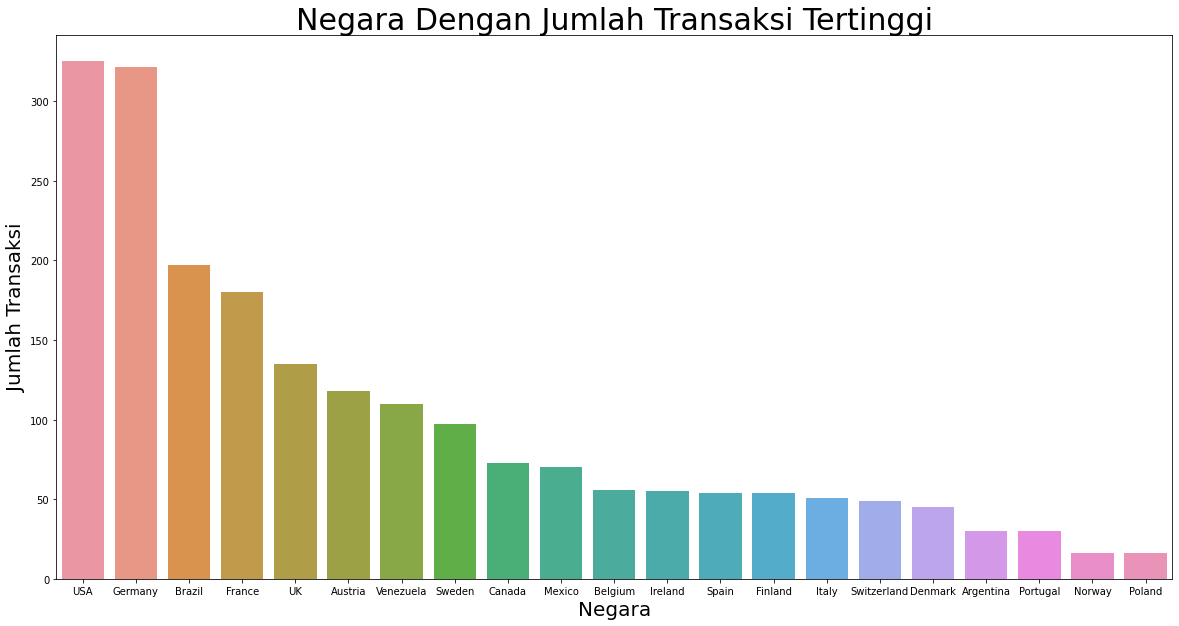

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['Country'],
            order = tabel1['Country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Transaksi', size = 20)
plt.title ('Negara Dengan Jumlah Transaksi Tertinggi', size = 30)
plt.show()

Berdasarkan data dari grafik di atas, terlihat jelas bahwa USA atau Amerika Serikat dan Jerman memiliki perbedaan jumlah pesanan yang tidak berbeda jauh dan menjadi dua negara yang memiliki jumlah pesanan yang tertinggi melebihi negara-negara lainnya. Oleh karena itu, potensi penjualan pada kedua negara ini harus digunakan untuk terus semakin meningkatkan penjualan yang ada.

Selain itu, negara Brazil dan Prancis menduduki posisi ketiga dan keempat sebagai negara dengan jumlah transaksi terbanyak. Walaupun jumlah transaksi mereka tidak sebanyak USA dan Jerman, kedua negara tersebut tetap memiliki potensi yang besar. Penelitian lebih lanjut untuk mencari tahu faktor-faktor yang mempengaruhi tingkat transaksi pada kedua negara ini serta peningkatan strategi marketing dapat dilakukan untuk meningkatkan tingkat transaksi pada kedua negara ini.

## **Status Keterlambatan dalam Pengiriman Barang**

**```Bagaimana Persentase status keterlambatan dalam pengiriman barang?```**

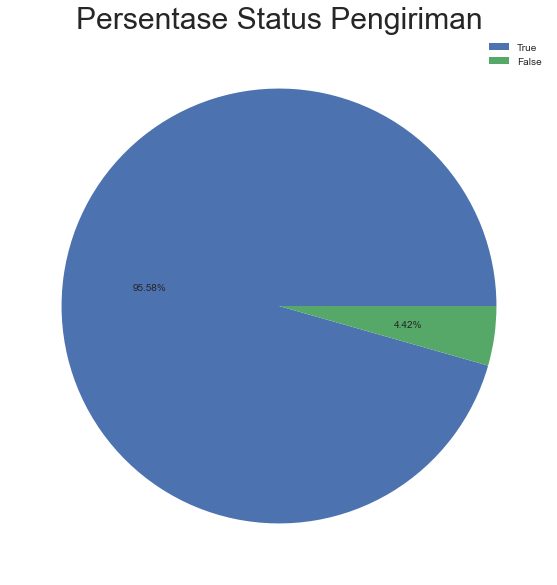

In [28]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.pie(tabel1['OnTimeShipped'].value_counts().values, 
        autopct='%.2f%%')
plt.title ('Persentase Status Pengiriman', size = 30)
plt.legend(tabel1['OnTimeShipped'].unique())
plt.show()

Berdasarkan status keterlambatan, terdapat 4,42% dari total transaksi yang mengalami keterlambatan dalam proses pengiriman. Tentunya proses keterlambatan dalam pengiriman ini dapat mempengaruhi tingkat kepuasan dan kepercayaan customer terhadap layanan yang kita lakukan. Hal tersebut dapat berakibat buruk terhadap citra perusahaan. Oleh karena itu, perusahaan harus mempertimbangkan dalam pemilihan layanan pengiriman untuk menghindari keterlambatan dalam pengiriman barang.

## **Product Terlaris**

**```Dari semua jenis produk yang dijual, jenis produk apa saja yang memiliki tingkat transaksi yang tinggi?```**

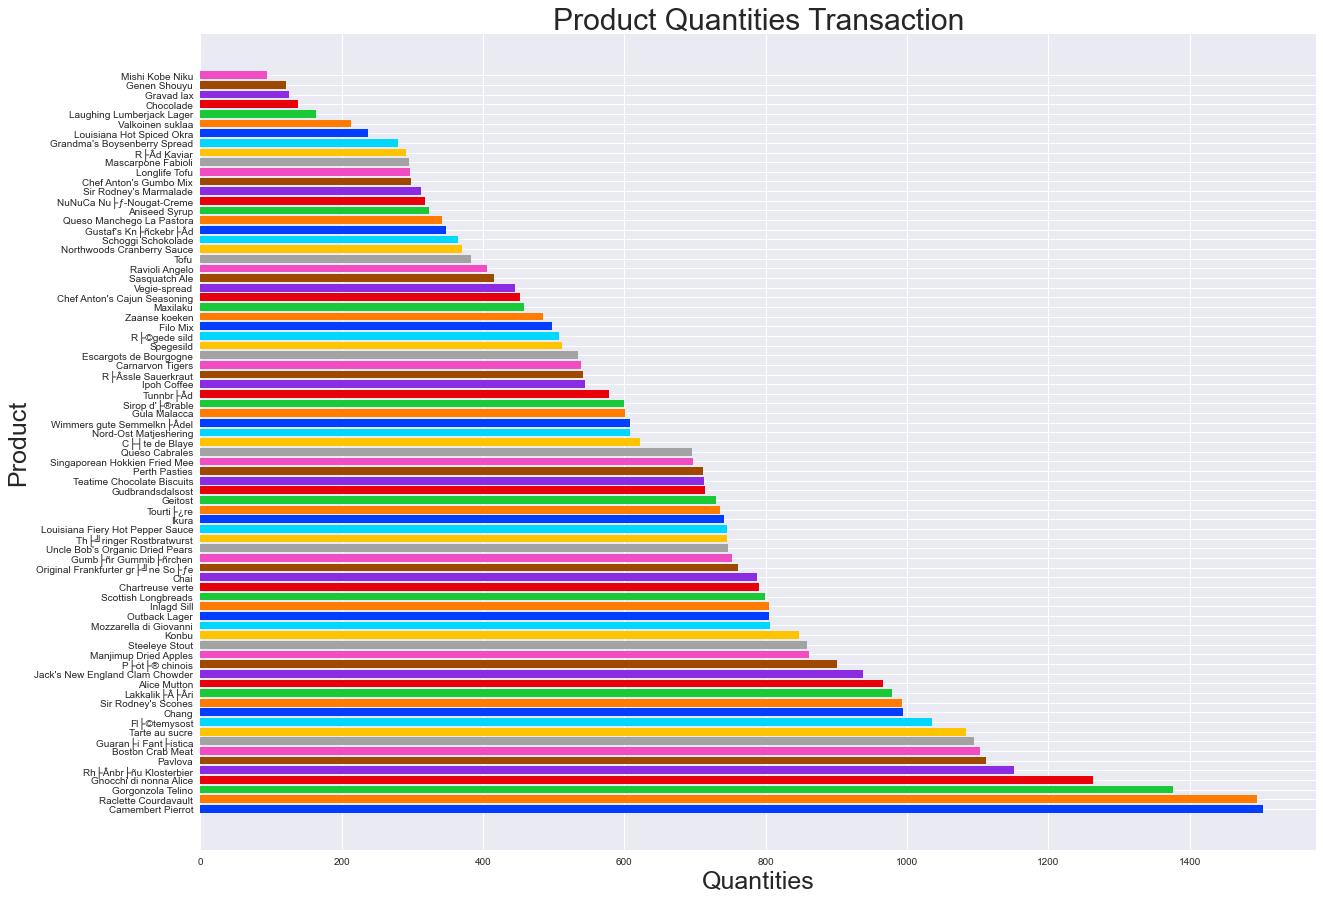

In [29]:
# Product Line Quantities

productQuanti = tabel1[['ProductName','Quantity']].groupby('ProductName').sum().sort_values('Quantity', ascending = False)
x = productQuanti.index
y = productQuanti['Quantity']

plt.style.use('seaborn')
plt.figure(figsize = (20,15))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Product Quantities Transaction', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Berdasarkan jenis produk, 5 produk yang memiliki tingkat order tertinggi adalah Camembert Pierrot, Raclette Courdavault, Gorgonzola Telino, Gnocchi di nonna Alice, dan Rh├Ânbr├ñu Klosterbier. Sementara 5 produk yang memiliki tingkat order terendah adalah Mishi Kobe Niku, Genen Shouyu, Gravad lax, Chocolade, dan Laughing Lumberjack Lager.

Dari data di atas, perusahaan dapat mempertimbangkan untuk meningkatkan jumlah stock dari produk-produk dengan tingkat order yang tinggi dan mempertimbangkan untuk mengurangi atau memberhentikan penyediaan produk-produk dengan tingkat order yang rendah.

## **Income Penjualan Makanan**

**```Bagaimana dengan pendapatan yang didapatkan dari penjualan? Apakah tingkat pendapatan mengalami kenaikan atau penurunan dari tahun ke tahun maupun bulan ke bulan?```**

In [30]:
yearprof = tabel1[['OrderDate', 'Quantity' ,'Income']].groupby(pd.DatetimeIndex(tabel1['OrderDate']).year).sum()
yearprof

,Quantity,Income
OrderDate,,
1994,7381.0,162844.340
1995,25007.0,590926.405
1996,17731.0,486084.864


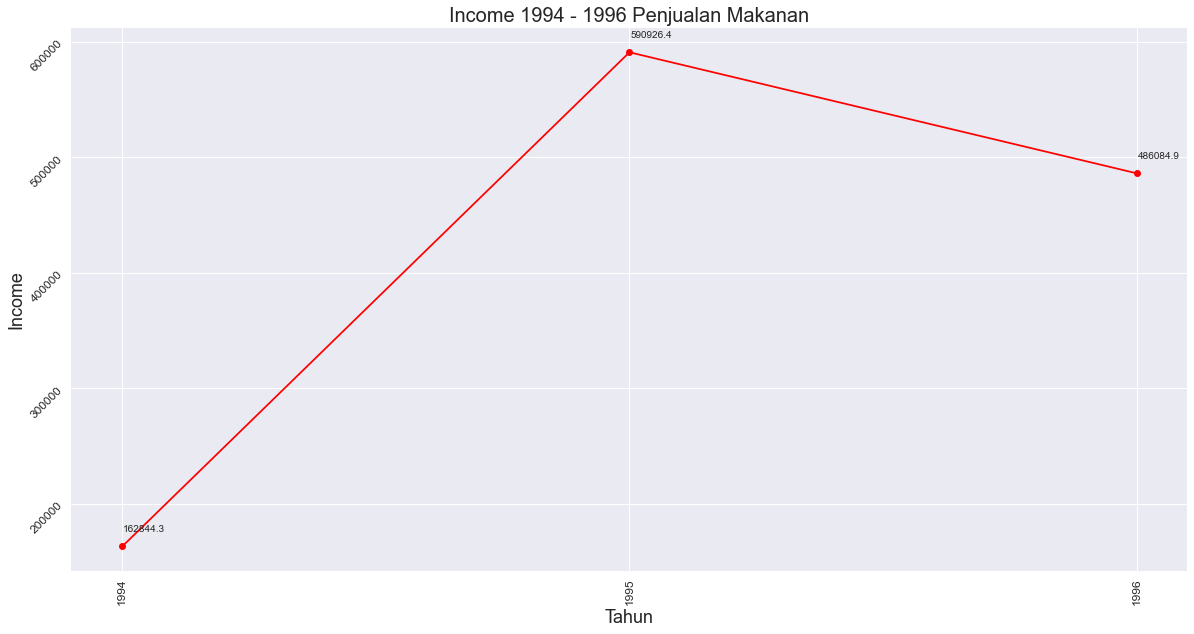

In [31]:
# Line Plot Year By Year Profit

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['Income'], 'ro-')
plt.title('Income 1994 - 1996 Penjualan Makanan', size = 20)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Income', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['Income'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

Berdasarkan grafik di atas, tingkat pendapatan mengalami peningkatan yang pesat dari tahun 1994 ke tahun 1995, yaitu dari 162.844 dollar meningkat hingga 590.926 dollar. Pada tahun 1996, tingkat pendapatan mengalami penurunan dari tahun sebelumnya. Meski begitu, kita tidak bisa langsung menarik kesimpulan bahwa tahun 1996 ini tidak berjalan dengan baik masalah penjualannya. Hal tersebut dikarenakan dari database yang dimiliki, tahun 1996 ini belum sepenuhnya selesai. Grafik di bawah akan menjelaskan bahwa tahun 1996 berakhir sampai bulan ke 6 saja. Artinya, masih ada 6 bulan pada tahun tersebut, di mana datanya masih belum tersedia.

Rata-rata puncak profit juga diperoleh pada bulan ke-3, terutama pada tahun 1996. Kenaikan profit dari bulan ke-2 ke bulan ke-3 menjadi sangat signifikan. Bukan tidak mungkin, dengan trend positif seperti demikian, tahun 1996 dapat menghasilkan profit yang jauh lebih besar daripada sebelumnya.

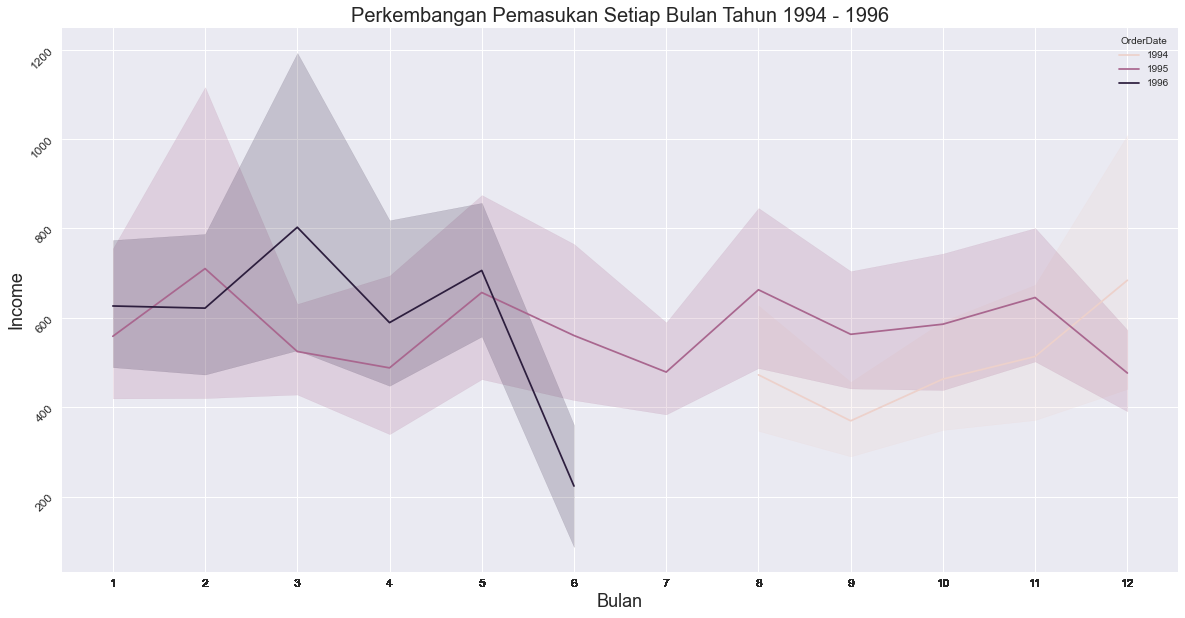

In [32]:
# Line Plot Profit Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['OrderDate']).month, y='Income', hue = pd.DatetimeIndex(tabel1['OrderDate']).year)
plt.title('Perkembangan Pemasukan Setiap Bulan Tahun 1994 - 1996', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Income', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['OrderDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

## **Perbedaan Pendapatan Tiap Perusahaan**

**```Apakah terdapat perbedaan nilai pendapatan antar 10 top local customer yang ada?```**

In [33]:
# Uji Normalitas Nilai Income 

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['Income'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 0.05)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 0.05)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 0.05)
DATA TIDAK BERDISTRIBUSI NORMAL


In [34]:
# Uji Perbandingan Nilai Income Antar Setiap Perusahaan (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['CompanyName'] == 'Save-a-lot Markets']['Income'],
    tabel1[tabel1['CompanyName'] == 'Ernst Handel']['Income'],
    tabel1[tabel1['CompanyName'] == 'QUICK-Stop']['Income'],
    tabel1[tabel1['CompanyName'] == 'Hungry Owl All-Night Grocers']['Income'],
    tabel1[tabel1['CompanyName'] == 'Berglunds snabbk├Âp']['Income'],
    tabel1[tabel1['CompanyName'] == 'Frankenversand']['Income'],
    tabel1[tabel1['CompanyName'] == 'Rattlesnake Canyon Grocery']['Income'],
    tabel1[tabel1['CompanyName'] == 'Folk och f├ñ HB']['Income'],
    tabel1[tabel1['CompanyName'] == 'HILARI├ôN-Abastos']['Income'],
    tabel1[tabel1['CompanyName'] == 'Bon app\'']['Income']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')

Tolak H0 Karena P-Value (0.0 < 5%)
Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada


## **Hubungan Pembelian dan Tingkat Pendapatan**

**```Apakah terdapat hubungan antara 'Quantity', 'unitPrice', 'Discount', dan 'Income'? Jika ya, variabel mana yang paling mempengaruhi satu sama lain?```**

<AxesSubplot:>

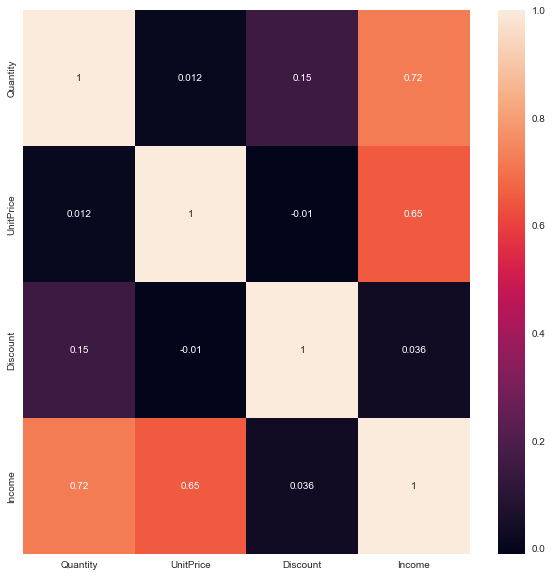

In [35]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['Quantity','UnitPrice','Discount','Income']].corr('spearman'), annot=True)
	

C:\Users\Filadelfia-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Quantity', ylabel='Income'>

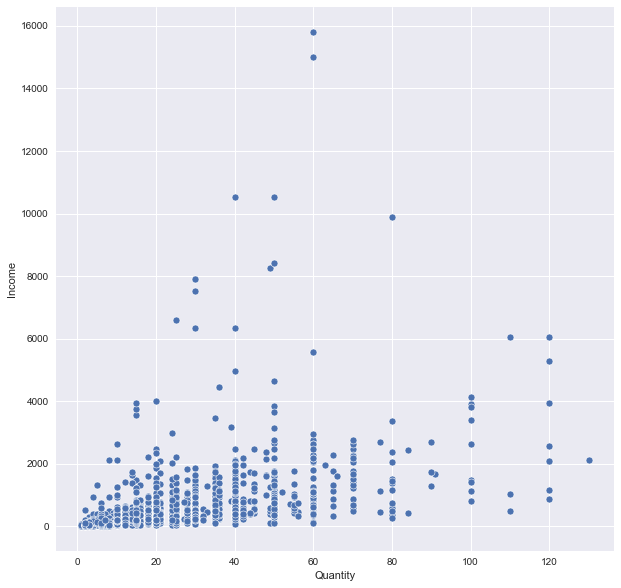

In [36]:
# Korelasi Antara Quantity dan Income

plt.figure(figsize=(10,10))
sns.scatterplot(tabel1['Quantity'], tabel1['Income'])